In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [41]:
data = {}
paramsNameList = []

# batchNames = ['v0_batch0', ... , 'v0_batch7'] # many Input syn Inh and Exc values
# batchNames = ['v0_batch7', 'v0_batch9', 'v0_batch10'] # same paramters and 3 seeds
# batchNames = ['v0_batch7', 'v0_batch8'] # same sim with no connections

batchNames = ['v0_batch4', 'v0_batch7', 'v0_batch11'] # 2 Input syn Inh and 3 Exc
number = 0
for batchName in batchNames:  
    number = number + 1  

    with open(batchName + '/' + batchName + '_batch.json', 'r') as f:
            batchInfo = json.load(f) 

    params = batchInfo['batch']['params']       
    for name in params:
        print(name['label'])
        print(name['values'])

    rateStimE = params[0]['values']
    rateStimI = params[1]['values']

    for p1 in range(np.size(rateStimE)):
        for p2 in range(np.size(rateStimI)):   
            paramsName  = 'rateStimE' + str(rateStimE[p1]) + '_rateStimI' + str(rateStimI[p2]) #+ '_' + str(number)
            paramsNameList.append(paramsName)
            with open(batchName + '/' + batchName + '_' + str(p1) + '_' + str(p2) + '.json', 'r') as f:
                data[paramsName] = json.load(f) 

rateStimE
[3.0]
rateStimI
[6.0, 9.0]
rateStimE
[6.0]
rateStimI
[6.0, 9.0]
rateStimE
[9.0]
rateStimI
[6.0, 9.0]


In [3]:
popNumber = np.linspace(1, 55, 55)
popParamLabels = list(data[paramsName]['simData']['popRates'])
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in popParamLabels:
    if popName not in Epops:
        Ipops.append(popName)

In [4]:
#------------------------------------------------------------------------------  
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('info/anatomy/S1-cells-distributions-Mouse.txt') as mtype_file:
	mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
cellParamLabels = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cellNumber[metype] = int(n)
	popLabel[metype] = mtype
	popNumber[mtype] = int(m)

	cellParamLabels.append(metype)


popNameName = {}
for mtype in popParamLabels:
    popNameName[mtype] = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	popNameName[mtype].append(metype)

In [5]:
recordCells = []
cellNameName = {}
for metype in cellParamLabels:
    cellNameName[metype] = []

cellNumberLabel = 0 
for metype in cellParamLabels:
    if cellNumber[metype] < 5:
        for numberME in range(cellNumber[metype]):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
    else:
        for numberME in range(5):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
                         
    cellNumberLabel = cellNumberLabel + cellNumber[metype]

# cellNameName = {}

# number = 0
# for cellName in list(data[paramsName]['simData']['V_soma']):
#     cellNameName[popParamLabels[number]] = cellName
#     number = number + 1

In [23]:
paramsNameList

['rateStimE6.0_rateStimI6.0_1',
 'rateStimE6.0_rateStimI9.0_1',
 'rateStimE6.0_rateStimI6.0_2',
 'rateStimE6.0_rateStimI9.0_2',
 'rateStimE6.0_rateStimI6.0_3',
 'rateStimE6.0_rateStimI9.0_3']

In [17]:
paramsNameListtocompare = [paramsNameList[5], paramsNameList[3], paramsNameList[1]]
def compare3FR(paramsNameListtocompare):
    plt.figure(figsize=(21,7))
    widths = 0.6
    plt.subplot(1, 3, 1) 
    number = 0
    for paramsName in paramsNameListtocompare:
        popRates = []
        popNames = []
        number2 = 0
        for popName in Epops:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(1.65, number2 + 0.13, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[4:13] + paramsName[21:]) 
        number = number + 1

    plt.ylim(12.5,-0.5)
    plt.xlim(0,2.0)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 2)  
    number = 0
    for paramsName in paramsNameListtocompare:   
        popRates = []
        popNames = []
        number2 = 0
        for popName in Ipops[0:15]:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(1.285, number2 + 0.15, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[4:13] + paramsName[21:]) 
        number = number + 1

    plt.ylim(14.5,-0.5)
    plt.xlim(0,1.5)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 3)   
    number = 0
    for paramsName in paramsNameListtocompare:    
        popRates = []
        popNames = []
        number2 = 0
        for popName in Ipops[15:]:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(20.0, number2 + 0.2, 'N=' + str(popNumber[popName]), fontsize=12)  
                number2 = number2 + 1          
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[4:13] + paramsName[21:]) 
        number = number + 1

    plt.ylim(26.5,-0.5)
    plt.xlim(0,23.0)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    
    namefig = 'FR_' + batchName + '_' 
    for paramsName in paramsNameListtocompare:    
         namefig = namefig + paramsName[4:13] + paramsName[21:] + '_' 
    namefig = namefig + '.png'
    plt.savefig(namefig, facecolor = 'white', bbox_inches='tight' , dpi=300)

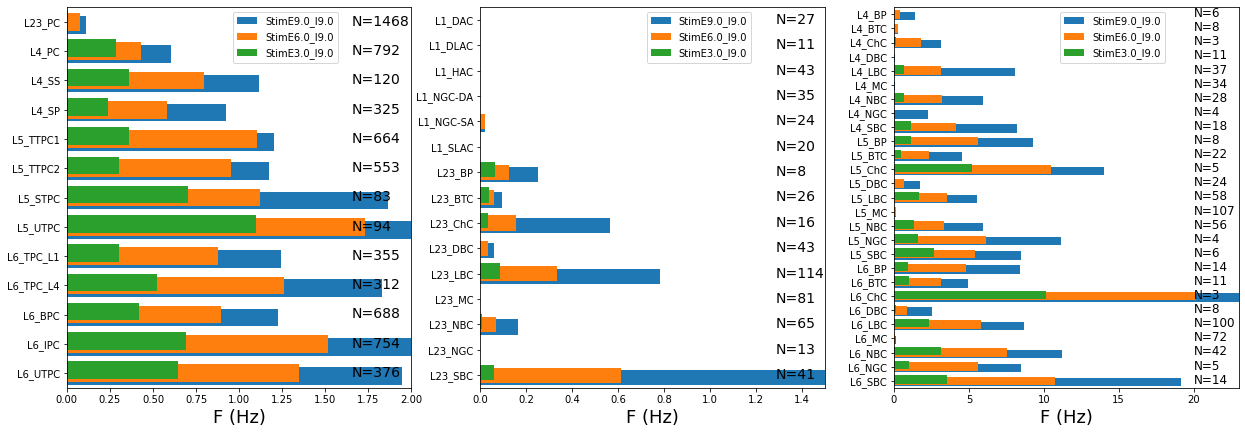

In [42]:
paramsNameListtocompare = [paramsNameList[5], paramsNameList[3], paramsNameList[1]]
compare3FR(paramsNameListtocompare)

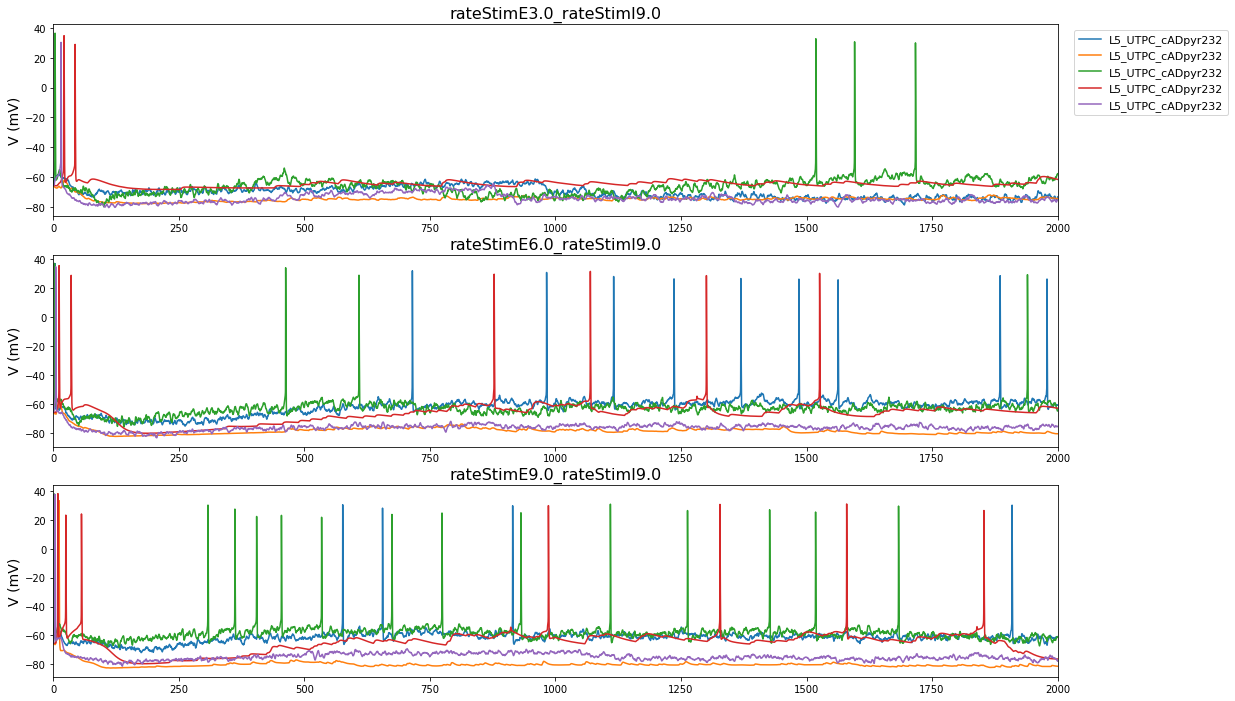

In [43]:
plt.figure(figsize=(18,12)) 
time = np.linspace(0, 2000, 20001)

popName = 'L5_UTPC'

plt.subplot(3, 1, 1) 
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:
        for paramsName in paramsNameList[1:2]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.legend(loc='upper right', bbox_to_anchor=(1.175, 1.0), fontsize=11)
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 2000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    

plt.subplot(3, 1, 2)  
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:   
        for paramsName in paramsNameList[3:4]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 2000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    

plt.subplot(3, 1, 3)  
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]  
    for cellName in cellNames: 
        for paramsName in paramsNameList[5:6]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 2000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    
        
plt.savefig('Vt_' + popName + '_' + batchName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [44]:
paramsNameList

['rateStimE3.0_rateStimI6.0',
 'rateStimE3.0_rateStimI9.0',
 'rateStimE6.0_rateStimI6.0',
 'rateStimE6.0_rateStimI9.0',
 'rateStimE9.0_rateStimI6.0',
 'rateStimE9.0_rateStimI9.0']

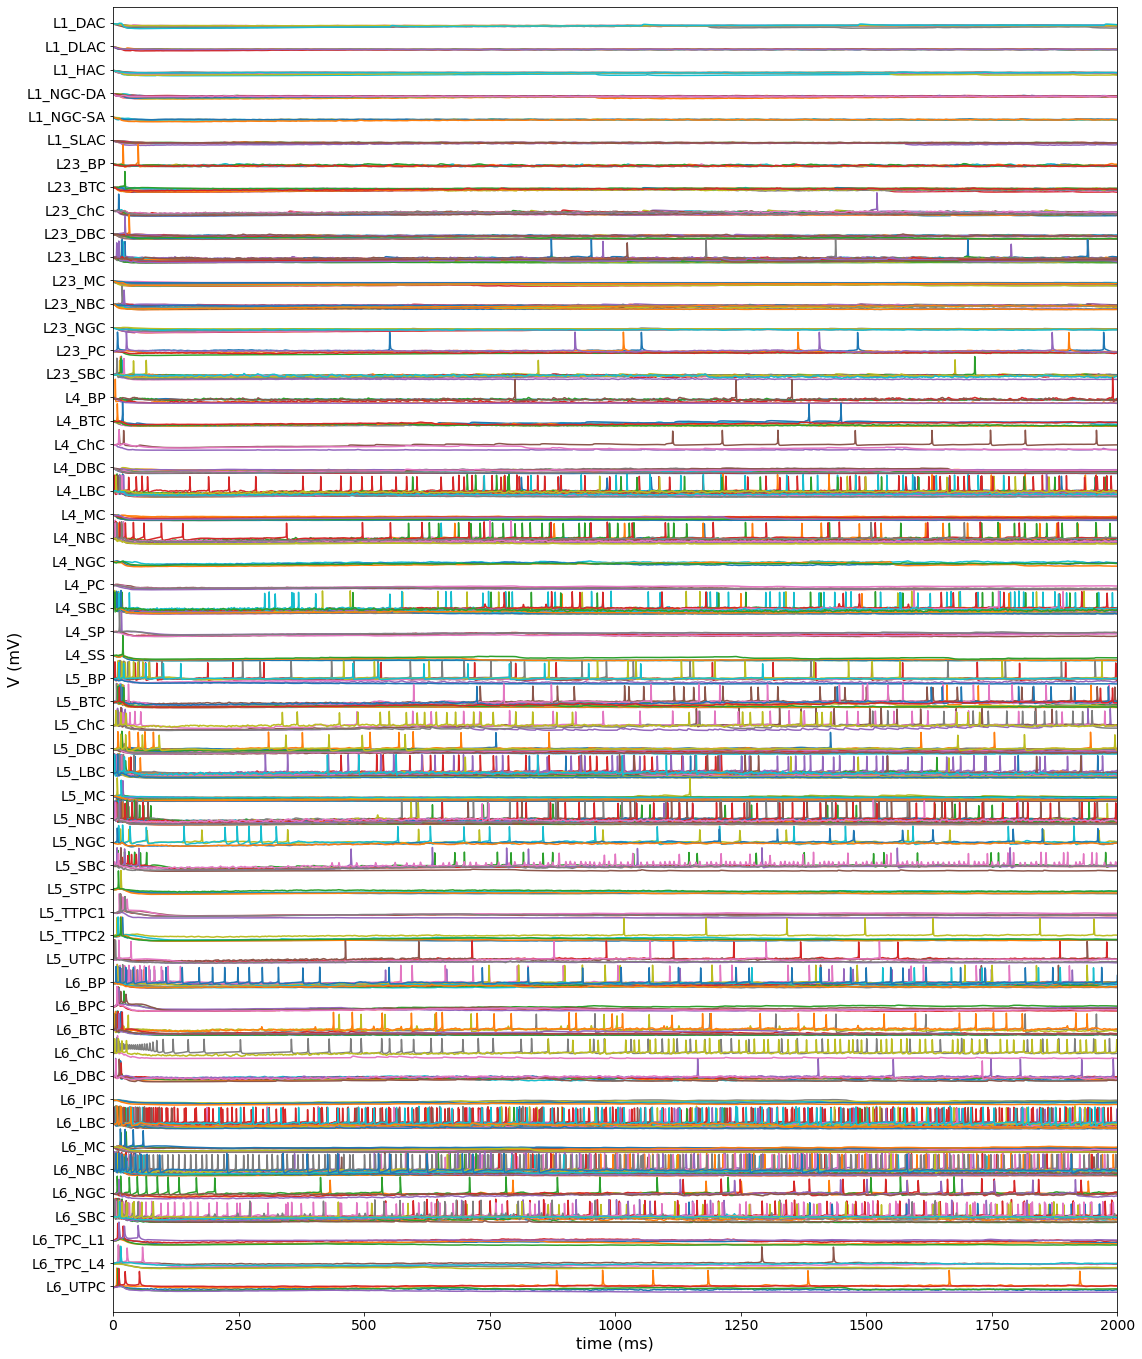

In [45]:
plt.figure(figsize=(18,24)) 
time = np.linspace(0, 2000, 20001)
plt.ylabel('V (mV)', fontsize=16)
plt.xlabel('time (ms)', fontsize=16)
plt.xlim(0, 2000)
# plt.ylim(-80, -30)
plt.ylim(-6670,20)
plt.yticks(np.arange(-6540,60,120),popParamLabels[::-1], fontsize=14)
plt.xticks(fontsize=14)

paramsName = paramsNameList[3]
number = 0
for popName in popParamLabels:   
    for metype in popNameName[popName]:
        cellNames = cellNameName[metype]
        for cellName in cellNames:
            Vt = np.array(data[paramsName]['simData']['V_soma'][cellName])
            plt.plot(time, (Vt-number*120.0)) 
    number = number + 1

plt.savefig('Vt_full_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)